 1.1 Statistical testing- practical
 1.2 Problem 1
 Here are some data from a study looking at the relationship between vaccination and the onset of
 pneumococcal pneumonia. The owner of a laboratory wants to keep sick leave as low as possible by
 keeping employees healthy through disease prevention programs. Many employees have contracted
 pneumonia leading to productivity problems due to sick leave from the disease. There is a vaccine
 for pneumococcal pneumonia, and the owner believes that it is important to get as many employees
 vaccinated as possible. Due to a production problem at the company that produces the vaccine,
 there is only enough vaccine for half the employees. In effect, there are two groups; employees who
 received the vaccine and employees who did not receive the vaccine. The company sent a nurse
 to every employee who contracted pneumonia to provide home health care and to take a sputum
 sample for culture to determine the causative agent. They kept track of the number of employees
 who contracted pneumonia and whether they had been vaccinated. The data were organized as
 follows:

 TASK 1. Input the data into R as a 2x2 matrix. Use the rownames() and colnames() functions
 to name the columns and rows. You may want to investigate the nrow argument to specify the
 shape of the matrix.

 TASK 2. Draw a barplot of the data using the barplot() function. Include a legend. Use the
 barplot help to work out how to do this

 TASK 3 Carry out a 𝜒2 test for independence of data. Answer these questions:
 • What is the null hypothesis?
 • What are the assumptions?
 • What does it tell you?
 TASK 4. Write a full reporting statement for the result obtained in this test

In [16]:
data <- c(73, 27, 54, 46)
pneumonia_matrix <- matrix(data, nrow = 2, byrow = TRUE)
rownames(pneumonia_matrix) <- c("Not sick", "Sick with pneumonia")
colnames(pneumonia_matrix) <- c("Vaccinated", "Unvaccinated")
print(pneumonia_matrix)

                    Vaccinated Unvaccinated
Not sick                    73           27
Sick with pneumonia         54           46


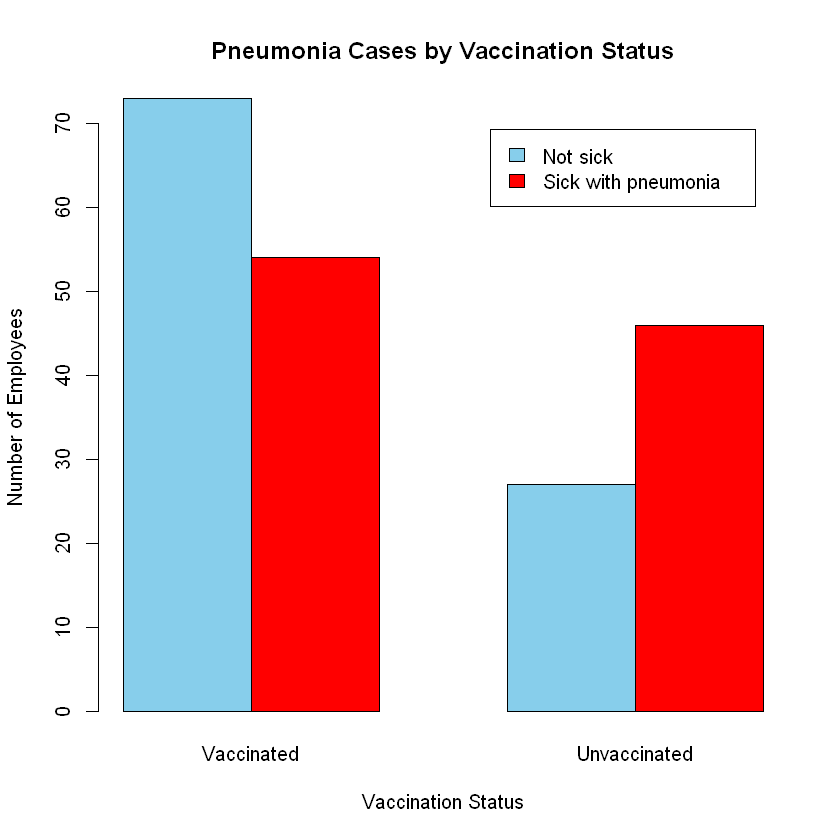

In [17]:
barplot(pneumonia_matrix,beside = TRUE,col = c("skyblue", "red"), 
main = "Pneumonia Cases by Vaccination Status",xlab = "Vaccination Status",
        ylab = "Number of Employees", 
legend.text = rownames(pneumonia_matrix),
        args.legend = list(x = "topright", inset = 0.05))

In [18]:
chisq.test(pneumonia_matrix)


	Pearson's Chi-squared test with Yates' continuity correction

data:  pneumonia_matrix
X-squared = 6.9895, df = 1, p-value = 0.008199


Now i want to extend this using Relative Risk Approch

In [19]:
risk_vaccinated <- pneumonia_matrix["Sick with pneumonia", "Vaccinated"] / 
sum(pneumonia_matrix[, "Vaccinated"])
risk_unvaccinated <- pneumonia_matrix["Sick with pneumonia", "Unvaccinated"] / 
sum(pneumonia_matrix[,"Unvaccinated"])

relative_risk <- risk_vaccinated / risk_unvaccinated

cat("Risk (Vaccinated):", risk_vaccinated, "\n")
cat("Risk (Unvaccinated):", risk_unvaccinated, "\n")
cat("Relative Risk:", relative_risk, "\n")

Risk (Vaccinated): 0.4251969 
Risk (Unvaccinated): 0.630137 
Relative Risk: 0.6747689 


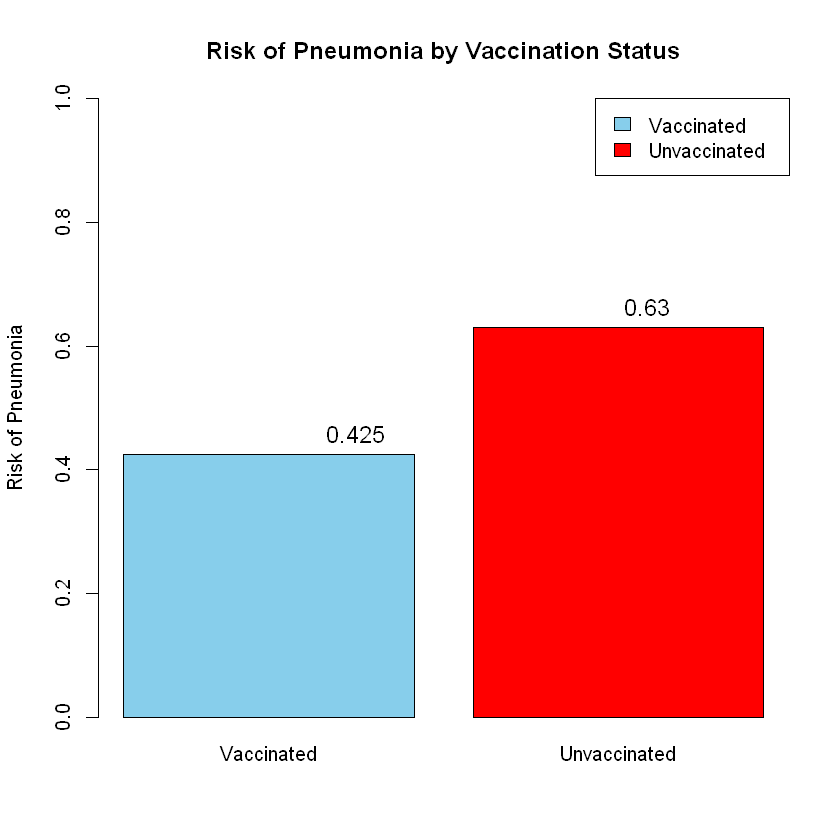

In [20]:
barplot(c(risk_vaccinated, risk_unvaccinated), 
        main = "Risk of Pneumonia by Vaccination Status", 
        ylab = "Risk of Pneumonia", 
        col = c("skyblue", "red"), 
        ylim = c(0, 1), 
        beside = TRUE,
        names.arg = c("Vaccinated", "Unvaccinated"))

text(x = seq_along(c(risk_vaccinated, risk_unvaccinated)), 
     y = c(risk_vaccinated, risk_unvaccinated), 
     labels = round(c(risk_vaccinated, risk_unvaccinated), 3), 
     pos = 3, cex = 1.2)

legend("topright", legend = c("Vaccinated", "Unvaccinated"),
       fill = c("skyblue", "red"))

Null Hypothesis states that:
There is no significant difference in the risk of contracting pneumonia between vaccinated and unvaccinated employees.

Now lets calculate 95% convidence interval for both vaccinated and Unvaccinated groups

In [21]:
calculate_ci <- function(successes, total, confidence_level = 0.95) {
  p_hat <- successes / total
  z <- qnorm((1 + confidence_level) / 2)
  se <- sqrt(p_hat * (1 - p_hat) / total)
  margin_of_error <- z * se
  lower_bound <- p_hat - margin_of_error
  upper_bound <- p_hat + margin_of_error
  return(c(lower_bound, upper_bound))
}
ci_vaccinated <- calculate_ci(pneumonia_matrix
["Sick with pneumonia", "Vaccinated"],sum(pneumonia_matrix[, "Vaccinated"]))
ci_unvaccinated <- calculate_ci(pneumonia_matrix
["Sick with pneumonia", "Unvaccinated"], sum(pneumonia_matrix[, "Unvaccinated"]))

cat("Risk (Vaccinated):", risk_vaccinated, "\n")
cat("Risk (Unvaccinated):", risk_unvaccinated, "\n")
cat("Confidence Interval (Vaccinated):", round(ci_vaccinated, 3), "\n")
cat("Confidence Interval (Unvaccinated):", round(ci_unvaccinated, 3), "\n")

Risk (Vaccinated): 0.4251969 
Risk (Unvaccinated): 0.630137 
Confidence Interval (Vaccinated): 0.339 0.511 
Confidence Interval (Unvaccinated): 0.519 0.741 


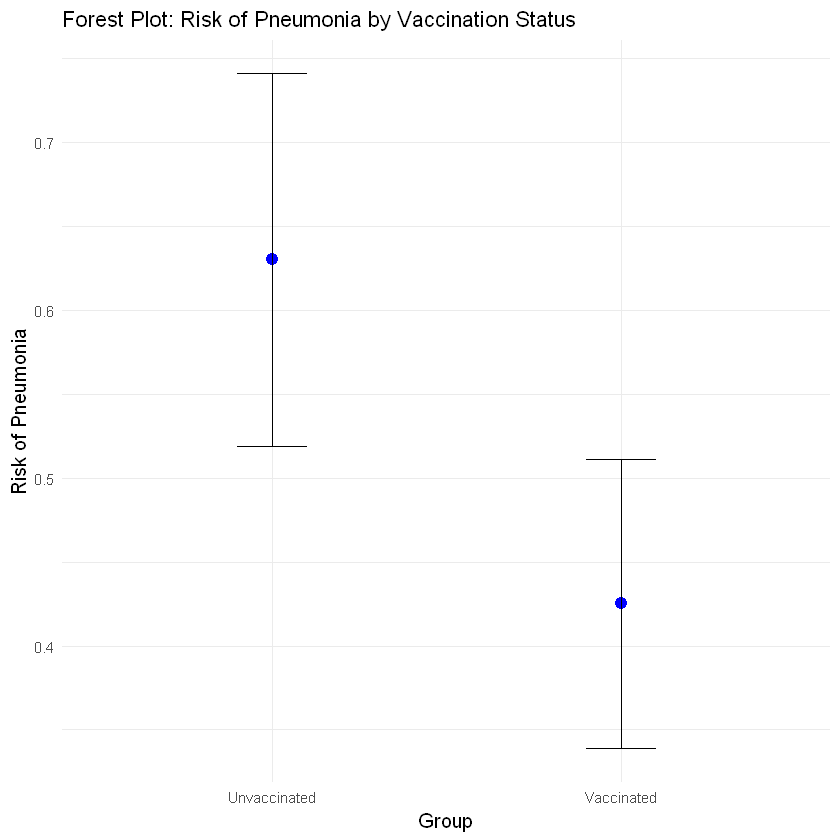

In [22]:
library(ggplot2)
risks <- c(risk_vaccinated, risk_unvaccinated)
conf_intervals <- data.frame(
  lower = c(0.339, 0.519),
  upper = c(0.511, 0.741) 
)
names(risks) <- c("Vaccinated", "Unvaccinated")
rownames(conf_intervals) <- c("Vaccinated", "Unvaccinated")

data_for_plot <- data.frame(
  group = c("Vaccinated", "Unvaccinated"),
  risk = risks,
  lower = conf_intervals$lower,
  upper = conf_intervals$upper
)
ggplot(data_for_plot, aes(x = group, y = risk)) +
  geom_point(size = 3, color = "blue") +
  geom_errorbar(aes(ymin = lower, ymax = upper), width = 0.2, color = "black") + 
  labs(title = "Forest Plot: Risk of Pneumonia by Vaccination Status", 
       x = "Group", y = "Risk of Pneumonia") +
  theme_minimal() +
  theme(axis.title.x = element_text(size = 12),
        axis.title.y = element_text(size = 12))


From the Above plot,
 We can see that C.I for vaccinated individual is 0.339 to 0.511 and for unvaccinated individual is from 0.591 to 0.741. Since C.I for both groups do not overlap, this suggest and significant difference in pneumonia risk between 2 groups.The analysis suggest that vaccination reduces the risk of contracting pneumonia.

In [23]:
a <- pneumonia_matrix["Sick with pneumonia", "Vaccinated"]
b <- pneumonia_matrix["Not sick", "Vaccinated"]
c <- pneumonia_matrix["Sick with pneumonia", "Unvaccinated"]
d <- pneumonia_matrix["Not sick", "Unvaccinated"]

odds_ratio <- (a / c) / (b / d)
cat("Odds Ratio:", round(odds_ratio, 3), "\n")


Odds Ratio: 0.434 


The Odds Ratio indicates that vaccinated individuls are 0.434 times as likely to contract pneumonia compared to unvaccinated prople

Conclusion:
From the above Chi-sqaure, Relativerisk, 95% confidence inteval and odds ratio analysis, we can validate that vaccination reduces the risk of contracting pneumonia